# Dynamics of the Dickson Fjord source

## The VLP seismic source

The radiation pattern and amplitude of the teleseismic VLP-signal is consistent with a point source expressed as a horizontal force of $5\times10^{11}\,\text{N}$ perpendicular to the axis of [Dickson Fjord](https://maps.greenmin.gl/geusmap/?mapname=greenland_portal&lang=en&lang=en#baslay=&optlay=&extent=886192.2292177897,8118880.9674197575,899263.7058444858,8125278.7347132&layers=g250_topographic_map_utm24n,byer_og_bygder,grl_stednavne,grl_ne_placenames&filter_1=new_greenlandic_name%3D%26danish_name%3D%26ogc_fid%3D&filter_3=placename.part%3D%26txt_search.part%3D%26official%3D).
This has been demonstrated by the computation of synthetic seismograms and quantitative comparison with teleseismic recordings.

The results from two different approaches are consistent in this respect.
The one approach uses the
[SAGE syngine](https://ds.iris.edu/ds/products/syngine/)
which provides synthetic waveforms based on computations with [AxiSEM](http://seis.earth.ox.ac.uk/axisem)
(Nissen-Meyer, T., van Driel, M., Stähler, S. C., Hosseini, K., Hempel, S., Auer, L., Colombi, A., and Fournier, A., 2014. AxiSEM: broadband 3-D seismic wavefields in axisymmetric media, Solid Earth, 5, 425–445, [DOI: 10.5194/se-5-425-2014](https://doi.org/10.5194/se-5-425-2014)). 
The other approach uses GEMINI 
(Wolfgang Friederich, Jörg Dalkolmo, 1995. Complete synthetic seismograms for a spherically symmetric earth by a numerical computation of the Green's function in the frequency domain. Geophysical Journal International, Volume 122, Issue 2, Pages 537–550, [DOI: 10.1111/j.1365-246X.1995.tb07012.x](https://doi.org/10.1111/j.1365-246X.1995.tb07012.x))
which computes seismograms for a spherically symmetric earth.
In our case seismograms for PREM
(Dziewonski, A.M., Anderson D.L., 1981. Preliminary reference Earth model. Phys. Earth planet. Inter., 25, 297–356. [DOI: 10.1016/0031-9201(81)90046-7](https://doi.org/10.1016/0031-9201(81)90046-7))
were computed.

## Purpose of this notebook

If the VLP-signal was generated by a seiche oscillation in Dickson Fjord (and this is just a hypothesis), then momentum has to be transferred between the Earth's body and the center of mass of the water, which is sloshing back and forth in the fjord.
Based on the computation of the seismic VLP signal, the oscillating force, which causes the respective oscillatory change of momentum, has an amplitude of $5\times10^{11}\,\text{N}$.
This notebook uses
1. this force amplitude (derived from the teleseismic observations),
2. the signal period (from the VLP observations),
3. the dimensions of the sloshing water body (estimated from the geometry of Dickson Fjord), 
4. a Q-value for the decay of the VLP-signal (from the VLP-observations), and
4. a Q-value for the decay of the seiche (from the numerical simulation)

to estimate values for
1. the volume and total mass of the sloshing water,
2. the vertical surface deflection of the water in the fjord,
3. the initial energy in the oscillating water body, and
4. the additional power input, which would be needed to keep the seiche going at the slow decay rate of the VLP-signal.

We further estimate what this would mean, if the additional input of energy would have to be drawn from the potential energy of water in a glacial lake above Dickson Fjord.

The notebook in addition uses
1. the initial height of the collapsed rock-mass,
2. the estimated volume of the rock-mass in the land slide, and
2. the mean density of the rock

to compare the water volume and initial energy of the sloshing water with the volume of the land-slide and the potential energy of the rock.

#### Disclaimer
All of these back-on-the-envelope calculations should be understood as rough estimates of magnitude, nothing more.
Readers are invited to modify the input values to explore the range of possible output values.

### Geometry of the water body

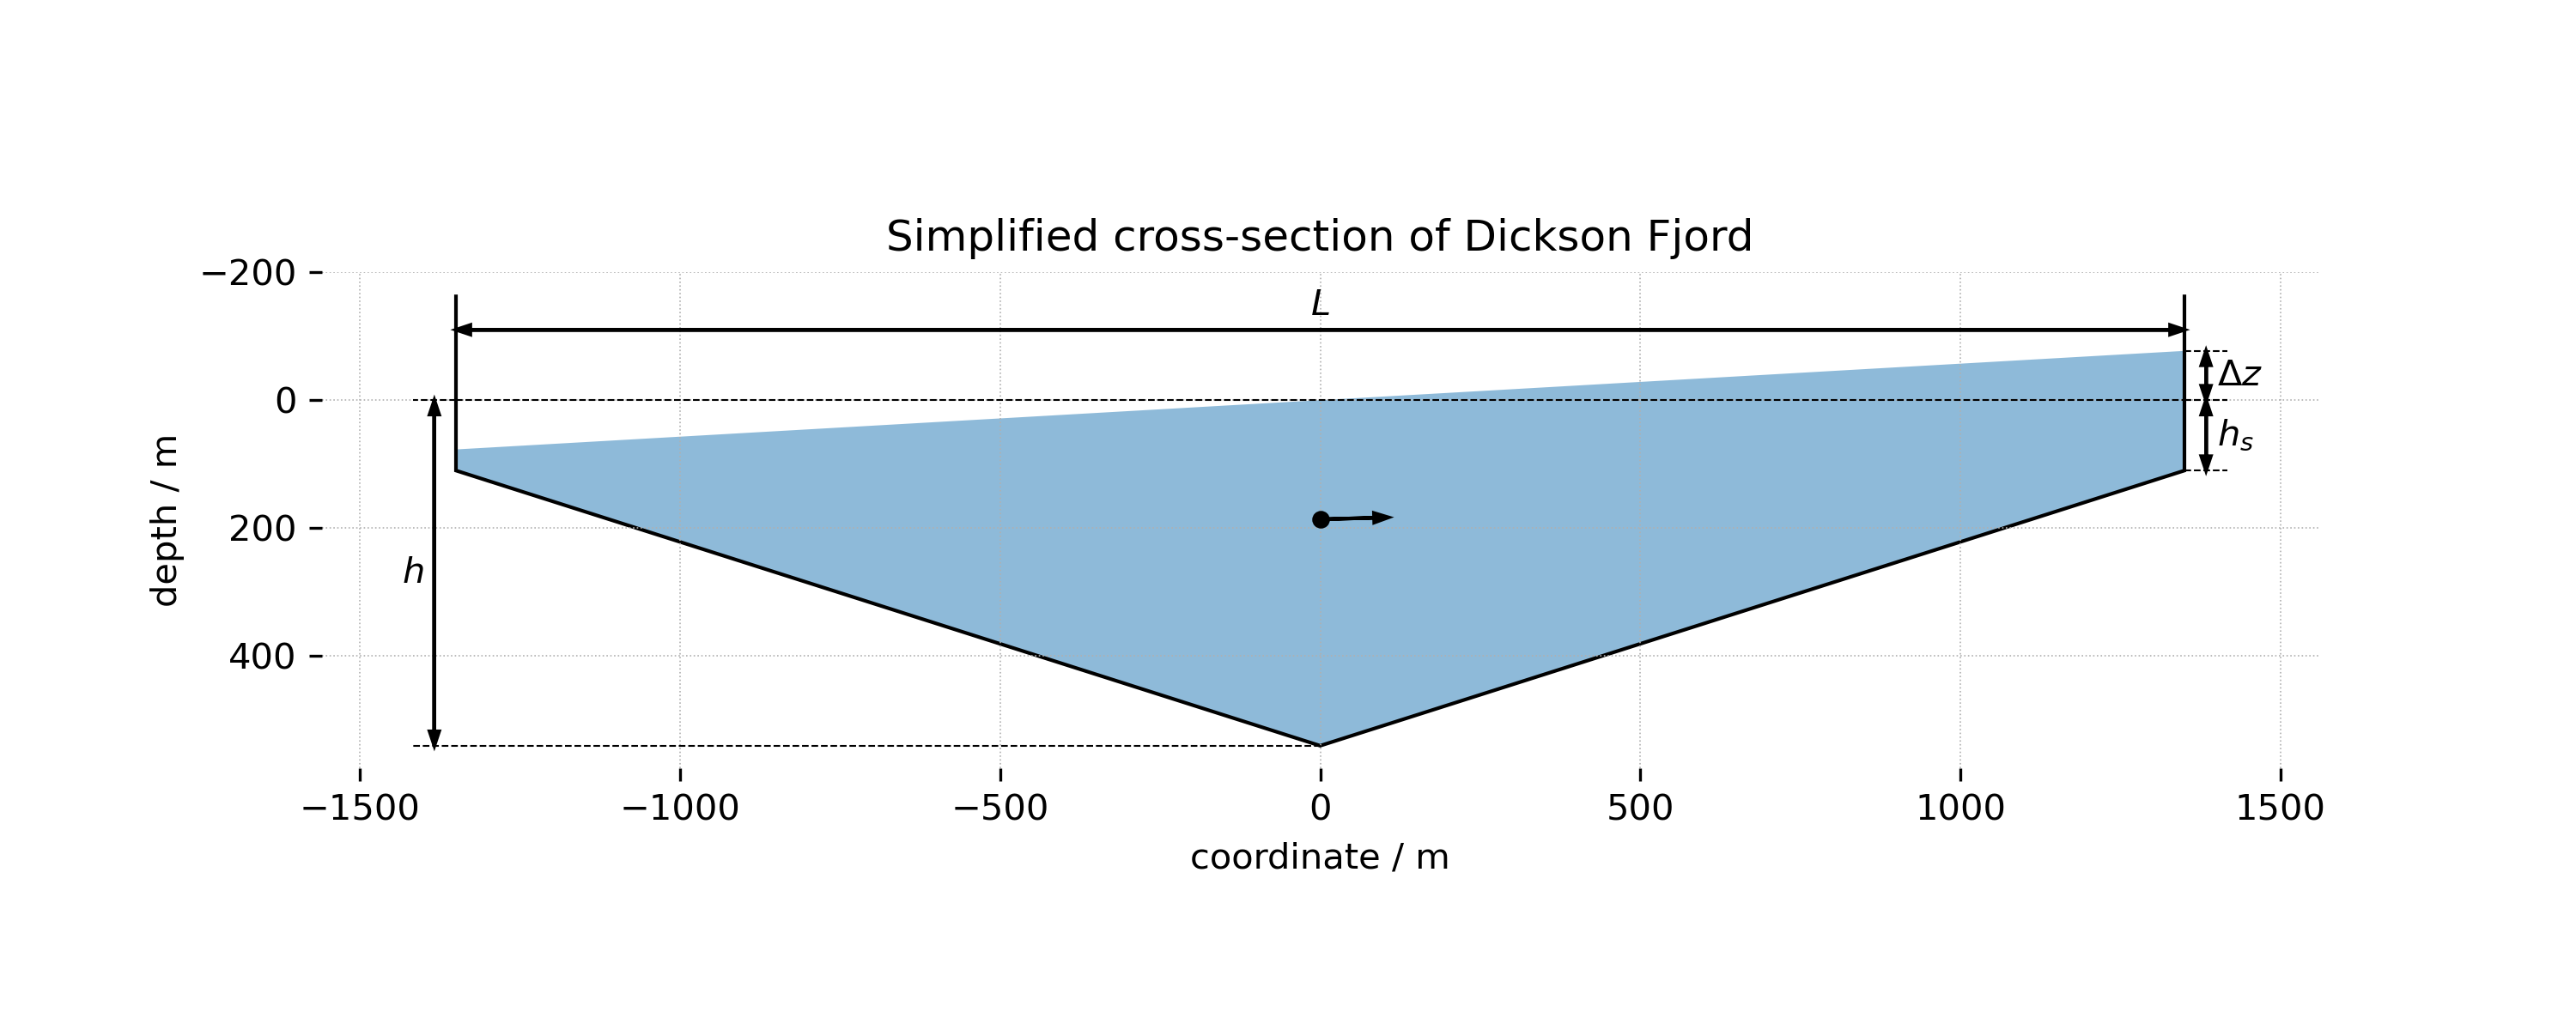

Notice: The values of $h_s$ and $\Delta z$ in the above sketch are strongly exaggerated with respect to the values actually used later.
This was chosen for better visibility in the sketch.

The cross-section of Dickson Fjord is taken a symmetrically triangular, which appears as a good 0th-order approximation of the bathymetry. 
To simplify the computation of the $x$-coordinate of the center of mass, we assume that the water body is confined by vertical walls at the shore of the fjord, which extend to $h_s$ below the water surface.  

Dimensions are:  
$L$: width of Dickson Fjord  
$h$: maximum depth  
$h_s$: vertical extent of wall at the shore to below the water surface  
$D$: section along the fjord, which takes part in the seiche  
$\Delta x$: horizontal amplitude of the oscillating center of mass  
$\Delta z$: maximum vertical deflection of the water surface at the shore of the fjord.

The undisturbed water surface is horizontal.
At maximum deflection of the seiche oscillation, the water surface is expected to be inclined with a constant gradient and maximum vertical displacement at the shore of the fjord and zero vertical displacement at the center of the fjord.
While the water surface is lowered on one half of the fjord, it is elevated in the other half, where the longitudinal axis of the fjord divides it into both halfs.

### Center of mass

The $x$-displacement of the center of mass is
$$
\Delta x=\frac{L}{3}\,\frac{\Delta z}{h+h_s},
$$
where the $x$-axis is perpendicular to the fjord's axis.   
**Beware:** $\Delta z$ is not the corresponding vertical displacement of the center of mass, but the maximum vertical deflection of the water surface,

## Amount of sloshing water

In [1]:
import numpy as np

### Set the values of input quantities

We understand the cross-section of the Dickson Fjord to be approximately triangular, specified by its width $w$ and maximum depth $h$.
A section of length $D$ along the fjord is considered to be affected by the seiche.
The entire body of water undergoes a horizontal motion, described by the horizontal displacement of the center of mass.

In [2]:
# width of Dickson Fjord / m
# value of 2700m given in the manuscript
L=2700.
# maximum depth of cross-section / m
h=540.
# the extent of the shore wall to below the water surface / m
hs=20.
# period of oscillation / s
T=92.
# amplitude of force needed for transfer of momentum / N
F=5.e11
# length of fjord's section being involved / m
# this is a pure guess
D=4*L
D=10.e3
print("the involved along-fjord section is %8.2fkm long." % (D*1.e-3))

the involved along-fjord section is    10.00km long.


In [3]:
# angular frequency of VLP signal / rad s**-1
omega=2.*np.pi/T
# approximate gravity / m s**-2
g=9.81

### Estimate the mass of water taking part in the oscillation

The total volume of water being affected by the seiche oscillation is 
$$
V=\frac{1}{2}\,L\,(h+h_s)\,D.
$$

In [4]:
# density of water / kg m**-3
rhow=1000.
# total volume of affected water body in the fjord / m**3
V=0.5*L*(h+hs)*D
# total mass moving in horizontal direction / kg
m=V*rhow
print("volume of water body: %8.2g m³" % V)
print("mass of oscillating water: %8.2g kg" % m)

volume of water body:  7.6e+09 m³
mass of oscillating water:  7.6e+12 kg


### Estimate the amplitude of horizontal displacement of the center of mass

The horizontal location of the center of mass of the sloshing water is
$x(t)=\Delta x\,\sin(\omega t)$
such that its kinematic acceleration becomes
$a(t)= \ddot x(t) = -\Delta x\,\omega^2\,\sin(\omega t).$
The amplitude of the force needed to provide this acceleration then is
$F=m\,a$ with $a=\Delta x\omega^2$
and hence
$$
\Delta x=\frac{F}{m\,\omega^2}.
$$

In [5]:
# horizontal displacement amplitude / m
dx=F/(m*omega**2)
print("horizontal displacement amplitude of center of mass: %8.2g m" % dx)

horizontal displacement amplitude of center of mass:       14 m


### Estimate the amplitude of vertical displacement of the water surface

With the above defined geometry the amplitude of the vertical displacement of the water surface at the shore wall is
$$
\Delta z=\Delta x \frac{3\,(h+h_s)}{L}.
$$

In [6]:
# vertical displacement of water surface at the shore / m
dz=dx*3*(h+hs)/L
print("vertical displacement of water surface: %8.2g m" % dz)
# volume of water being displaced from one half of the fjord to the other / m**3
dV=L*dz*D/4
print("volume of displaced water: %8.2g m³" % dV)
# weight force of the elevated water volume / N
Fw=dV*rhow*g
print("weight force of displaced water: %8.2g N" % Fw)

vertical displacement of water surface:      8.8 m
volume of displaced water:    6e+07 m³
weight force of displaced water:  5.8e+11 N


For comparison: The numerical simulations predict an initial amplitude of 5 m to 10 m.
The estimate for the volume in the land-slide is $(25.5\pm1.6)\times 10^{6}\,\text{m}^{3}$ of rock and $(2.3\pm0.17)\times 10^{6}\,\text{m}^{3}$ of glacial ice in the avalanche in addition.
The weight force must act as the restoring force in the oscillation and hence is expected at the order of magnitude of the force which produces the horizontal transfer of momentum (mediated by forces at the static bottom of the fjord; static in the sense that the displacement of the fjord's bottom is much smaller than the displacement of the water particles).

## Energy considerations

The kinetic energy of the sloshing water is
$$
E_{\text{kin}}(t)=\frac{1}{2}\,m\,\dot x^2(t).
$$
We compute its amplitude.

In [7]:
# peak velocity of sloshing water / m s**-1
v=dx*omega
print("peak velocity of sloshing water: %8.2g m/s" % v)
# initial energy in oscillation
E=0.5*m*(dx*omega)**2
print("initial energy in seiche oscillation: %8.2g J" % E)

peak velocity of sloshing water:     0.97 m/s
initial energy in seiche oscillation:  3.5e+12 J


### Estimate the additional energy needed to keep the seiche oscillation running

In [8]:
# amplitude loss per cycle at given Q
def Damp(Q):
    return 1.-np.exp(-np.pi/Q)

In [9]:
# dissipated power for free seiche (Q=226) as from numerical simulation / W
Pseiche=Damp(226)**2*E/T
# dissipated power for observed decay of VLP signal (initial Q=500 increasing to 3000) / W
Posc=Damp(500)**2*E/T
# power input needed to keep oscillation going 
# at observed amplitude / W
Pinp=Pseiche-Posc
print("power loss in free seiche (due to dissipation): %8.2g W" % Pseiche)
print("power loss in actual oscillation: %8.2g W" % Posc)
print("average power input needed: %8.2g W = %8.2g MW" % (Pinp, Pinp*1.e-6))

power loss in free seiche (due to dissipation):  7.3e+06 W
power loss in actual oscillation:  1.5e+06 W
average power input needed:  5.8e+06 W =      5.8 MW


### Estimate the effect of draining a glacial lake to input its potential energy to the seiche

Compute the needed current of water, if this amount of energy would have to be supplied from potential energy of a water reservoir at the altitude of the Greendland ice shield.  
The potential energy of a water body at height `H` is $E_{\text{pot}}=\rho\,g\,H\,V$.  
The rate of volume needed to provide the power of $P=\text{d} E_{\text{pot}}/\text{d} t$ due to run-off to the fjord becomes
$$
\frac{\text{d} V}{\text{d} t}=\frac{P}{\rho\,g\,H}.
$$

In [10]:
# height above Dickson Fjord of water reservoirs 
# in the source region of Hisinger Gletscher / m
# the manuscript specifies a height of 1200m
# the actual center of mass might be a bit lower
H=1000.
# potential energy of 1 m**3 of water at the height H / J
Epot=rhow*g*H
print("potential energy of 1 m³ of water at %4.0fm height: %8.3g J = %5.1f MJ" % (H,Epot,1.e-6*Epot))
# volume rate for run-off / m**3 s**-1
Vrate=Pinp/(rhow*g*H)
print("volume rate for run-off needed to supply %5.1f MW: %8.1f m³/s" % (Pinp*1.e-6, Vrate))

potential energy of 1 m³ of water at 1000m height: 9.81e+06 J =   9.8 MJ
volume rate for run-off needed to supply   5.8 MW:      0.6 m³/s


Lake [Findelen Sø](https://maps.greenmin.gl/geusmap/?mapname=greenland_portal&lang=en&lang=en#baslay=&optlay=&extent=848881.9174664984,8103758.269731623,866358.2466546535,8113055.983461988&layers=g250_topographic_map_utm24n,byer_og_bygder,grl_stednavne,grl_ne_placenames&filter_1=new_greenlandic_name%3D%26danish_name%3D%26ogc_fid%3D&filter_3=placename.part%3D%26txt_search.part%3D%26official%3D)
has an approximate surface area of 9 km².
By how much would its surface level sink if it would be drained to supply the necessary power?  

In [11]:
# surface area of lake Findelen Sø / m**2
Alake=9.e6
# sink rate / m s**-1
hrate=Vrate/Alake
print("the surface of lake Findelen Sø would sink by %8.2g m/s = %6.2f um/s" % (hrate, 1.e6*hrate))
# let the process go on for 1 day
Tdrain=86400
print("after one day the surface of the lake would be lowered by %8.2f mm" % (1.e3*hrate*Tdrain))

the surface of lake Findelen Sø would sink by  6.6e-08 m/s =   0.07 um/s
after one day the surface of the lake would be lowered by     5.71 mm


**Notice**: We compute for a constant power. Actually the required power is time dependend like the power loss in the free seiche on the one hand and the VLP source on the other hand is.

## Compare with values estimated for the rock-body

We try a quick-and-dirty estimate of the energy put into the fjord by the collapse of the mountain.

The bedrocks are paragneiss/metasediments.
The mean density of the collapsed rock is expected to be around $2800\,\text{kg}\,\text{m}^{-3}$
to $2900\,\text{kg}\,\text{m}^{-3}$.

In [12]:
# rock volume / m**3
Vrock=2.5e7
# rock density / kg m**-3
rhorock=2850.
# potential energy of rock:
Epotrock=Vrock*rhorock*g*H
print("mass of collapsed rock: %8.2g kg" % (Vrock*rhorock))
print("potential energy of rock: %8.2g J" % Epotrock)
print("initial energy in seiche oscillation: %8.2g J" % E)

mass of collapsed rock:  7.1e+10 kg
potential energy of rock:    7e+14 J
initial energy in seiche oscillation:  3.5e+12 J


The inversion of the land-slide seismic source suggests a rock-mass of $5.1\times 10^{10}\,\text{kg}$, however depending on the estimated run-out distance.
The manuscript specifies a total mass of rock in the range of $5\times 10^{10}\,\text{kg}$ to $6.9\times 10^{10}\,\text{kg}$ based on estimates of the collapsed volume.
Depending on scaling laws it might even be $7.8\times 10^{10}\,\text{kg}$ to $10.3\times 10^{10}\,\text{kg}$ for the land-slide seismic source.